In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
import logging


In [61]:

df_feature = pd.read_csv('feature_frames.csv')
print("Shape df_feature:", df_feature.shape)

Shape df_feature: (2880549, 27)


In [50]:
for column in df_feature.select_dtypes(include=[np.number]).columns:
    mode_value = df_feature[column].mode().iloc[0]
    count_mode = df_feature[column].value_counts().iloc[0]
    total_values = df_feature[column].count()
    frequency = count_mode / total_values
    print(f"Columna: {column}, Valor más repetido: {mode_value}, Frecuencia: {frequency:.2f} ({count_mode}/{total_values})")

Columna: variant_id, Valor más repetido: 33615294398596, Frecuencia: 0.00 (3446/2880549)
Columna: order_id, Valor más repetido: 3642856079492, Frecuencia: 0.00 (976/2880549)
Columna: user_id, Valor más repetido: 3437823688836, Frecuencia: 0.00 (12649/2880549)
Columna: user_order_seq, Valor más repetido: 2, Frecuencia: 0.50 (1430901/2880549)
Columna: outcome, Valor más repetido: 0.0, Frecuencia: 0.99 (2847317/2880549)
Columna: ordered_before, Valor más repetido: 0.0, Frecuencia: 0.98 (2819658/2880549)
Columna: abandoned_before, Valor más repetido: 0.0, Frecuencia: 1.00 (2878794/2880549)
Columna: active_snoozed, Valor más repetido: 0.0, Frecuencia: 1.00 (2873952/2880549)
Columna: set_as_regular, Valor más repetido: 0.0, Frecuencia: 1.00 (2870093/2880549)
Columna: normalised_price, Valor más repetido: 0.0810517755489292, Frecuencia: 0.05 (130754/2880549)
Columna: discount_pct, Valor más repetido: 0.0380622837370241, Frecuencia: 0.01 (41352/2880549)
Columna: global_popularity, Valor más re

Just to take a look at the impact that some inputed values (as we saw in the EDA) may have in our problem

In [51]:
df_feature.head()

,variant_id,product_type,order_id,user_id,created_at,order_date,user_order_seq,outcome,ordered_before,abandoned_before,...,count_children,count_babies,count_pets,people_ex_baby,days_since_purchase_variant_id,avg_days_to_buy_variant_id,std_days_to_buy_variant_id,days_since_purchase_product_type,avg_days_to_buy_product_type,std_days_to_buy_product_type
0,33826472919172,ricepastapulses,2807985930372,3482464092292,2020-10-05 16:46:19,2020-10-05 00:00:00,3,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
1,33826472919172,ricepastapulses,2808027644036,3466586718340,2020-10-05 17:59:51,2020-10-05 00:00:00,2,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
2,33826472919172,ricepastapulses,2808099078276,3481384026244,2020-10-05 20:08:53,2020-10-05 00:00:00,4,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
3,33826472919172,ricepastapulses,2808393957508,3291363377284,2020-10-06 08:57:59,2020-10-06 00:00:00,2,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
4,33826472919172,ricepastapulses,2808429314180,3537167515780,2020-10-06 10:37:05,2020-10-06 00:00:00,3,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618


In [52]:
df_feature.columns

Index(['variant_id', 'product_type', 'order_id', 'user_id', 'created_at',
       'order_date', 'user_order_seq', 'outcome', 'ordered_before',
       'abandoned_before', 'active_snoozed', 'set_as_regular',
       'normalised_price', 'discount_pct', 'vendor', 'global_popularity',
       'count_adults', 'count_children', 'count_babies', 'count_pets',
       'people_ex_baby', 'days_since_purchase_variant_id',
       'avg_days_to_buy_variant_id', 'std_days_to_buy_variant_id',
       'days_since_purchase_product_type', 'avg_days_to_buy_product_type',
       'std_days_to_buy_product_type'],
      dtype='object')

In [53]:
df_feature.describe()

,variant_id,order_id,user_id,user_order_seq,outcome,ordered_before,abandoned_before,active_snoozed,set_as_regular,normalised_price,...,count_children,count_babies,count_pets,people_ex_baby,days_since_purchase_variant_id,avg_days_to_buy_variant_id,std_days_to_buy_variant_id,days_since_purchase_product_type,avg_days_to_buy_product_type,std_days_to_buy_product_type
count,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,...,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06
mean,3.401250e+13,2.978388e+12,3.750025e+12,3.289342e+00,1.153669e-02,2.113868e-02,6.092589e-04,2.290188e-03,3.629864e-03,1.272808e-01,...,5.492182e-02,3.538562e-03,5.134091e-02,2.072549e+00,3.312961e+01,3.523734e+01,2.645304e+01,3.143513e+01,3.088810e+01,2.594969e+01
std,2.786246e+11,2.446292e+11,1.775710e+11,2.140176e+00,1.067876e-01,1.438466e-01,2.467565e-02,4.780109e-02,6.013891e-02,1.268378e-01,...,3.276586e-01,5.938048e-02,3.013646e-01,3.943659e-01,3.707162e+00,1.057766e+01,7.168323e+00,1.227511e+01,4.330262e+00,3.278860e+00
min,3.361529e+13,2.807986e+12,3.046041e+12,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.599349e-02,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.414214e+00,0.000000e+00,7.000000e+00,2.828427e+00
25%,3.380354e+13,2.875152e+12,3.745901e+12,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.394416e-02,...,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,3.300000e+01,3.000000e+01,2.319372e+01,3.000000e+01,2.800000e+01,2.427618e+01
50%,3.397325e+13,2.902856e+12,3.812775e+12,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.105178e-02,...,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,3.300000e+01,3.400000e+01,2.769305e+01,3.000000e+01,3.100000e+01,2.608188e+01
75%,3.428495e+13,2.922034e+12,3.874925e+12,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.352670e-01,...,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,3.300000e+01,4.000000e+01,3.059484e+01,3.000000e+01,3.400000e+01,2.796118e+01
max,3.454300e+13,3.643302e+12,5.029635e+12,2.100000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,3.000000e+00,1.000000e+00,6.000000e+00,5.000000e+00,1.480000e+02,8.400000e+01,5.868986e+01,1.480000e+02,3.950000e+01,3.564191e+01


Basic info which I want to have by hand.

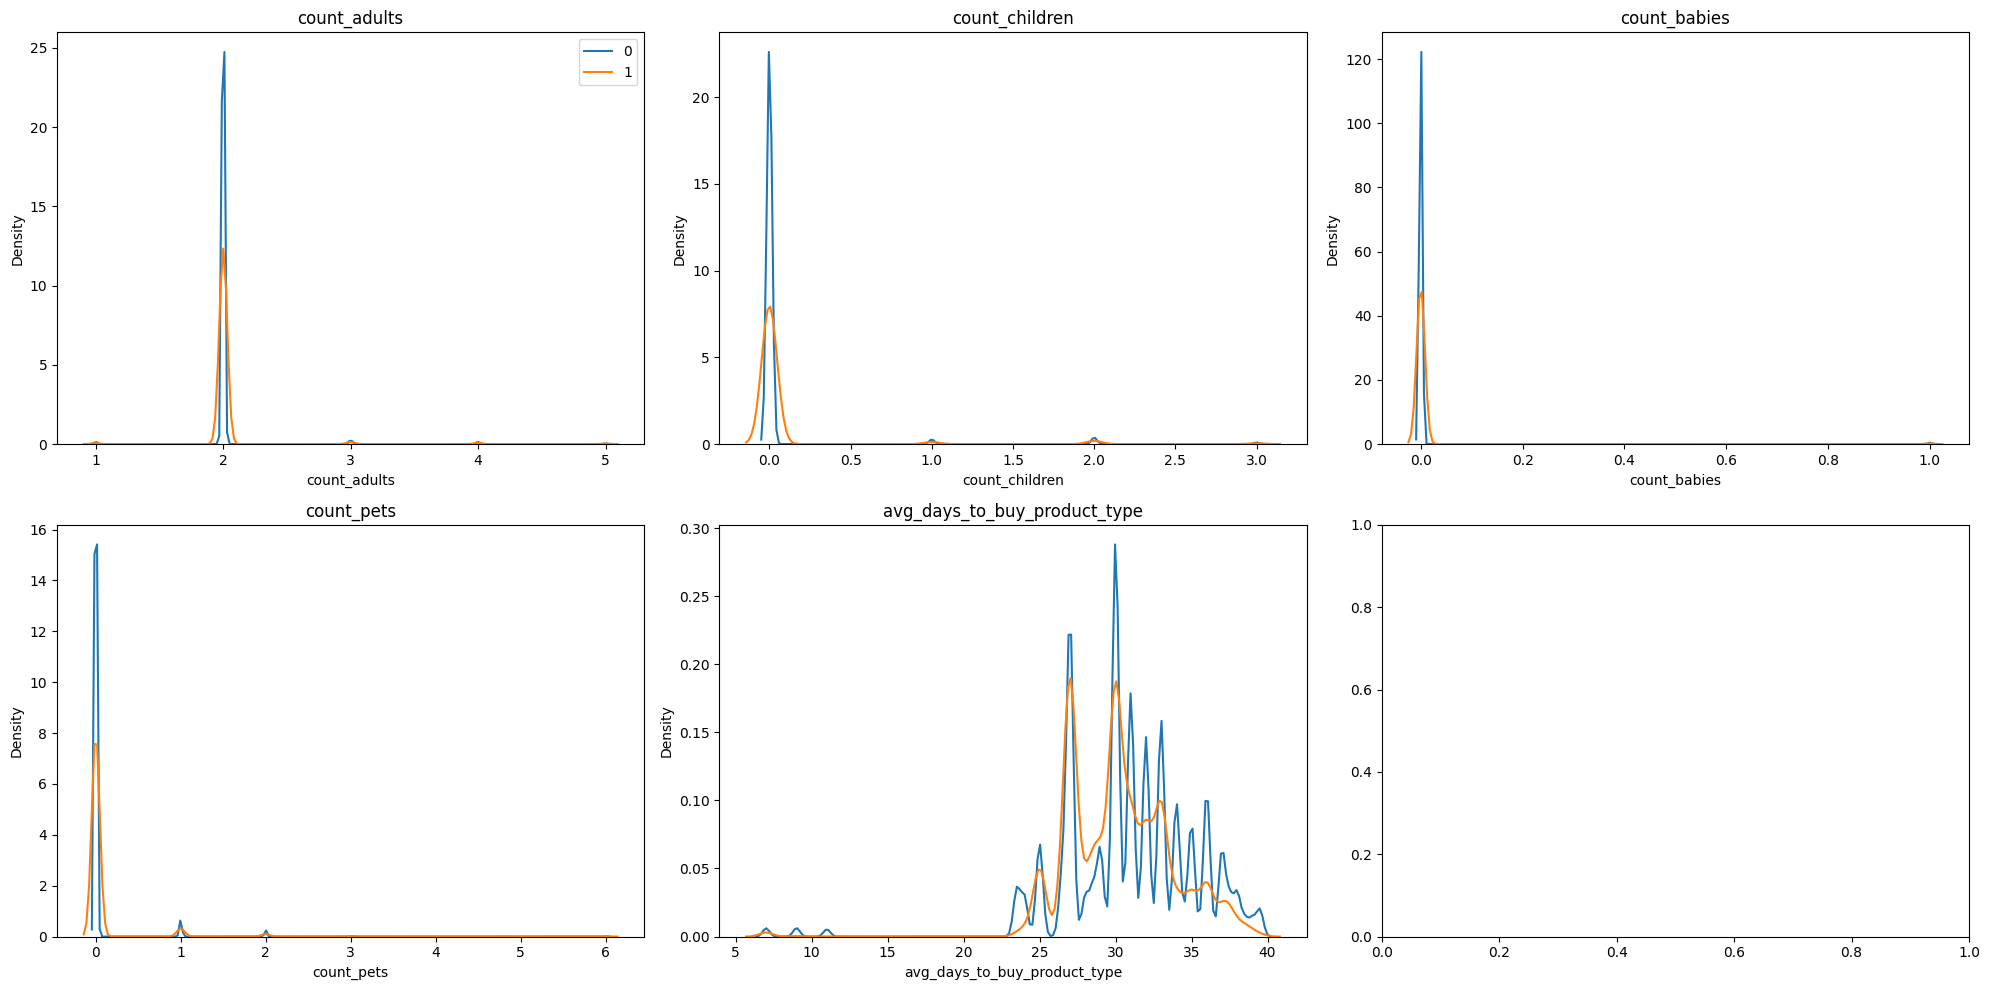

In [54]:

numerical_cols = ['count_adults', 'count_children', 'count_babies', 'count_pets', 'avg_days_to_buy_product_type']
outcome_exists = 'outcome' in df_feature.columns 

if outcome_exists:
    cols = 3
    rows = int(np.ceil(len(numerical_cols) / cols))
    fig, ax = plt.subplots(rows, cols, figsize=(20, 5*rows))
    ax = ax.flatten()

    for i, col in enumerate(numerical_cols):
        sns.kdeplot(df_feature.loc[lambda x: x.outcome == 0, col], label='0', ax=ax[i])
        sns.kdeplot(df_feature.loc[lambda x: x.outcome == 1, col], label='1', ax=ax[i])
        ax[i].set_title(col)

    ax[0].legend()

    plt.tight_layout()
else:
    print("The 'outcome' column does not exist in the dataframe.")


Here we can observe some of the inputed values mentioned before.

In [65]:
products_per_order = df_feature.groupby('order_id').size()
orders_with_at_least_5_products = products_per_order[products_per_order >= 5].index

filtered_data = df_feature[df_feature['order_id'].isin(orders_with_at_least_5_products)]


print("Shape original de df_feature:", df_feature.shape)
print("Shape de filtered_data después del filtrado:", filtered_data.shape)


Shape original de df_feature: (2880549, 27)
Shape de filtered_data después del filtrado: (2880549, 27)


As we can se the number of rows stays the same , I will make some tests to chek whats happening

In [66]:
print("Número de 'order_id' con al menos 5 productos:", len(orders_with_at_least_5_products))


Número de 'order_id' con al menos 5 productos: 3446


In [67]:
print("Número de filas únicas por 'order_id' en 'filtered_data':", filtered_data['order_id'].nunique())
print("Número de filas únicas en 'df_feature':", df_feature.drop_duplicates(subset='order_id').shape[0])
print("Filas en 'df_feature' que deberían ser excluidas:")
excluded_order_ids = products_per_order[products_per_order < 5].index
print(df_feature[df_feature['order_id'].isin(excluded_order_ids)].head())



Número de filas únicas por 'order_id' en 'filtered_data': 3446
Número de filas únicas en 'df_feature': 3446
Filas en 'df_feature' que deberían ser excluidas:
Empty DataFrame
Columns: [variant_id, product_type, order_id, user_id, created_at, order_date, user_order_seq, outcome, ordered_before, abandoned_before, active_snoozed, set_as_regular, normalised_price, discount_pct, vendor, global_popularity, count_adults, count_children, count_babies, count_pets, people_ex_baby, days_since_purchase_variant_id, avg_days_to_buy_variant_id, std_days_to_buy_variant_id, days_since_purchase_product_type, avg_days_to_buy_product_type, std_days_to_buy_product_type]
Index: []

[0 rows x 27 columns]


It seems that our dataset is already filtered to orders of 5 products or more

In [ ]:
# Calcula las frecuencias de las categorías
freq_product_type = df_feature['product_type'].value_counts() / len(df_feature)
freq_vendor = df_feature['vendor'].value_counts() / len(df_feature)

# Mapea las frecuencias a las columnas originales
df_feature['product_type'] = df_feature['product_type'].map(freq_product_type)
df_feature['vendor'] = df_feature['vendor'].map(freq_vendor)


This is a freq encoding of the columns  'product_type' and 'vendor' , I dont know if this is the correct way to do that.

In [69]:
df_feature.head

<bound method NDFrame.head of              variant_id        product_type       order_id        user_id  \
0        33826472919172     ricepastapulses  2807985930372  3482464092292   
1        33826472919172     ricepastapulses  2808027644036  3466586718340   
2        33826472919172     ricepastapulses  2808099078276  3481384026244   
3        33826472919172     ricepastapulses  2808393957508  3291363377284   
4        33826472919172     ricepastapulses  2808429314180  3537167515780   
...                 ...                 ...            ...            ...   
2880544  33826439594116  healthcarevitamins  3643254800516  3893722808452   
2880545  33826439594116  healthcarevitamins  3643274788996  3883757174916   
2880546  33826439594116  healthcarevitamins  3643283734660  3874925314180   
2880547  33826439594116  healthcarevitamins  3643294515332  3906490826884   
2880548  33826439594116  healthcarevitamins  3643301986436  3914253959300   

                  created_at           order_

Now I want to divide the order date colums into year,month and day so it can be handeled as a single value column by our model, I dont know is this is a good practice or if there is a better solution.

In [16]:
import pandas as pd


df_feature['order_date'] = pd.to_datetime(df_feature['order_date'])
df_feature['created_at'] = pd.to_datetime(df_feature['created_at'])

df_feature['order_year'] = df_feature['order_date'].dt.year
df_feature['order_month'] = df_feature['order_date'].dt.month
df_feature['order_day'] = df_feature['order_date'].dt.day


df_feature['created_hour'] = df_feature['created_at'].dt.hour

#día de la semana o si es fin de semana
df_feature['order_dayofweek'] = df_feature['order_date'].dt.dayofweek
df_feature['order_is_weekend'] = df_feature['order_date'].dt.dayofweek >= 5


df_feature.drop(['order_date', 'created_at'], axis=1, inplace=True)

In [17]:
print(df_feature.shape)
df_feature.describe()

(2880549, 31)


,variant_id,product_type,order_id,user_id,user_order_seq,outcome,ordered_before,abandoned_before,active_snoozed,set_as_regular,...,avg_days_to_buy_variant_id,std_days_to_buy_variant_id,days_since_purchase_product_type,avg_days_to_buy_product_type,std_days_to_buy_product_type,order_year,order_month,order_day,created_hour,order_dayofweek
count,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,...,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06
mean,3.401250e+13,2.762532e-02,2.978388e+12,3.750025e+12,3.289342e+00,1.153669e-02,2.113868e-02,6.092589e-04,2.290188e-03,3.629864e-03,...,3.523734e+01,2.645304e+01,3.143513e+01,3.088810e+01,2.594969e+01,2.020684e+03,4.696157e+00,1.549961e+01,1.424203e+01,2.905320e+00
std,2.786246e+11,1.874006e-02,2.446292e+11,1.775710e+11,2.140176e+00,1.067876e-01,1.438466e-01,2.467565e-02,4.780109e-02,6.013891e-02,...,1.057766e+01,7.168323e+00,1.227511e+01,4.330262e+00,3.278860e+00,4.649840e-01,4.523839e+00,8.743562e+00,4.741962e+00,2.028230e+00
min,3.361529e+13,9.095488e-04,2.807986e+12,3.046041e+12,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,1.414214e+00,0.000000e+00,7.000000e+00,2.828427e+00,2.020000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,3.380354e+13,1.575429e-02,2.875152e+12,3.745901e+12,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,3.000000e+01,2.319372e+01,3.000000e+01,2.800000e+01,2.427618e+01,2.020000e+03,1.000000e+00,8.000000e+00,1.100000e+01,1.000000e+00
50%,3.397325e+13,2.015866e-02,2.902856e+12,3.812775e+12,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,3.400000e+01,2.769305e+01,3.000000e+01,3.100000e+01,2.608188e+01,2.021000e+03,2.000000e+00,1.600000e+01,1.400000e+01,3.000000e+00
75%,3.428495e+13,3.826875e-02,2.922034e+12,3.874925e+12,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.000000e+01,3.059484e+01,3.000000e+01,3.400000e+01,2.796118e+01,2.021000e+03,1.100000e+01,2.300000e+01,1.800000e+01,5.000000e+00
max,3.454300e+13,7.862182e-02,3.643302e+12,5.029635e+12,2.100000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,8.400000e+01,5.868986e+01,1.480000e+02,3.950000e+01,3.564191e+01,2.021000e+03,1.200000e+01,3.100000e+01,2.300000e+01,6.000000e+00


I want to make the train val test split avoiding information leakage, in our case I dont want our trained model to have info of the clients of our dataset which will be used for later testing

In [18]:
import pandas as pd
from sklearn.model_selection import GroupShuffleSplit


'''Perform the split while keeping 'user_id' grouped and divide into train, validation, and test split.'''

group_column = 'user_id'
gss = GroupShuffleSplit(n_splits=1, train_size=0.7, test_size=0.3, random_state=42)


for train_idx, test_idx in gss.split(df_feature, groups=df_feature[group_column]):
    train_val = df_feature.iloc[train_idx]
    test = df_feature.iloc[test_idx]


X_train_val = train_val.drop('outcome', axis=1).values
X_test = test.drop('outcome', axis=1).values
y_train_val = train_val['outcome'].values
y_test = test['outcome'].values


train_val_gss = GroupShuffleSplit(n_splits=1, train_size=(5/7), test_size=(2/7), random_state=42)

for train_idx, val_idx in train_val_gss.split(train_val, groups=train_val[group_column]):
    train = train_val.iloc[train_idx]
    val = train_val.iloc[val_idx]


X_train = train.drop('outcome', axis=1).values
X_val = val.drop('outcome', axis=1).values
y_train = train['outcome'].values
y_val = val['outcome'].values

df_feature.drop('outcome', axis=1, inplace=True)

In [19]:
print(X_train.shape)  
print(X_val.shape)  
print(X_test.shape)  

print(y_train.shape)  
print(y_val.shape)  
print(y_test.shape)  
  

(1446128, 30)
(568780, 30)
(865641, 30)
(1446128,)
(568780,)
(865641,)


Ive choosed userid over orderid as groupby criteria because userid contains orderid by definition(same orders are made by same users)

Now I will normalize the numerical columns to avoid naturally bigger values to impose over smaller ones ( I dont know if normalizing colums such as day, month or the ones coded by frequency as vendors will ruin the data or if its ok to do it)

In [20]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

scaler = StandardScaler()

X_train_s = scaler.fit_transform(X_train)
X_val_s= scaler.transform(X_val)
X_test_s= scaler.transform(X_test)

In [21]:
import numpy as np


print('TRAINING SET')
print('Mean of each feature: ', np.round(np.mean(X_train_s,0),2))
print('Std of each feature: ', np.round(np.std(X_train_s,0),2))
print('\nVALIDATION SET')
print('Mean of each feature: ', np.round(np.mean(X_val_s,0),2))
print('Std of each feature: ', np.round(np.std(X_val_s,0),2))
print('\nTEST SET')
print('Mean of each feature: ', np.round(np.mean(X_test_s,0),2))
print('Std of each feature: ', np.round(np.std(X_test_s,0),2))

TRAINING SET
Mean of each feature:  [-0.  0. -0. -0. -0. -0.  0.  0.  0.  0. -0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0.  0. -0. -0. -0.  0. -0. -0. -0.  0.  0.]
Std of each feature:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]

VALIDATION SET
Mean of each feature:  [ 0.01 -0.    0.07  0.13 -0.14 -0.02 -0.01 -0.03  0.01  0.   -0.   -0.
 -0.   -0.05 -0.1  -0.08  0.02 -0.11  0.   -0.01 -0.01  0.01 -0.01 -0.01
  0.06 -0.04 -0.08 -0.   -0.05 -0.04]
Std of each feature:  [1.01 1.   1.07 0.87 0.66 0.95 0.81 0.69 1.07 1.   1.   1.   1.   0.53
 0.71 0.   1.29 0.65 0.96 1.   1.   0.97 1.01 1.01 0.98 0.98 1.01 1.04
 1.01 0.98]

TEST SET
Mean of each feature:  [ 0.   -0.   -0.01  0.07  0.03  0.02  0.    0.01  0.    0.    0.   -0.
 -0.   -0.12 -0.09 -0.08 -0.01 -0.13  0.01 -0.   -0.    0.   -0.   -0.
  0.03 -0.03 -0.08 -0.03 -0.05 -0.03]
Std of each feature:  [1.   1.   0.98 0.91 1.14 1.05 1.02 1.09 1.03 1.   1.   1.   1.   0.55
 0.76 0.   1.31 0.57 1.

I wont fit the scaler with non-training data as val and test datasets ahould no be avaliable at this point

97.44
97.18
Precision: 0.1713187126174879
recall: 0.34273504273504274


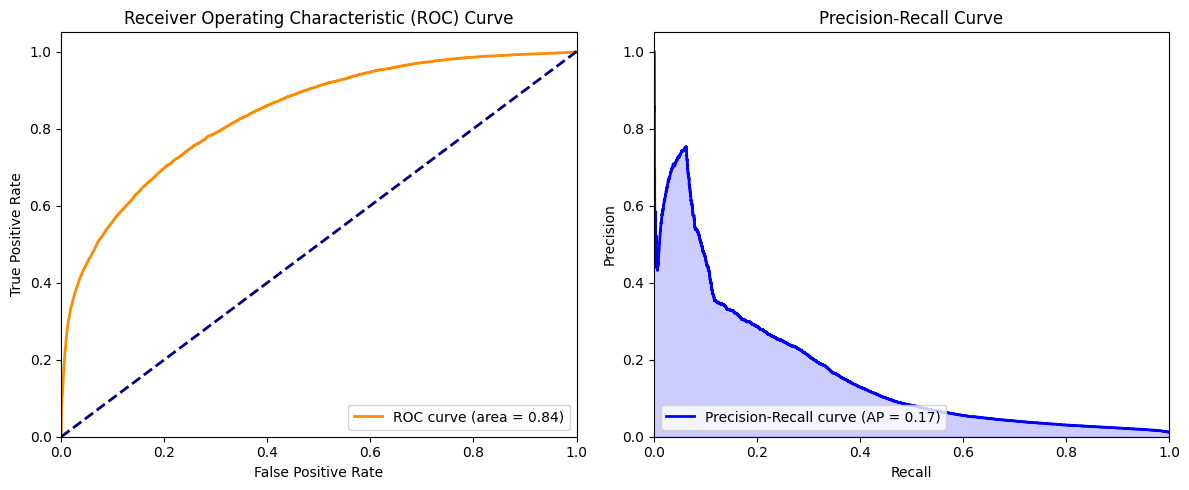

In [35]:
#YOUR CODE HERE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score, precision_score, recall_score
import matplotlib.pyplot as plt


lda = LinearDiscriminantAnalysis()
lda.fit(X_train_s, y_train)
predict_LDA = lda.predict(X_test_s)
Score_LDA_train = lda.score(X_train_s, y_train)
LDA_score = lda.score(X_test_s, y_test)


precision = precision_score(y_test, predict_LDA)
recall = recall_score(y_test, predict_LDA)


print(round(Score_LDA_train*100,2))
print(round(LDA_score*100,2))
print(f'Precision: {precision}')
print(f'recall: {recall}')

y_scores_lda = lda.decision_function(X_test_s)


fpr, tpr, _ = roc_curve(y_test, y_scores_lda)
roc_auc = auc(fpr, tpr)


precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_scores_lda)
average_precision = average_precision_score(y_test, y_scores_lda)


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")


plt.subplot(1, 2, 2)
plt.plot(recall_curve, precision_curve, color='blue', lw=2, label='Precision-Recall curve (AP = %0.2f)' % average_precision)
plt.fill_between(recall_curve, precision_curve, step='post', alpha=0.2, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()



The model doesnt seem to be great but I dont really know if its valid. 

In [23]:

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import numpy as np



penalty = (None, 'l2')
C = [0.01, 0.05, 0.1, 0.5, 1, 5, 10]

l_penalty = len(penalty)
l_C = len(C)
results_lr = np.zeros((l_penalty, l_C))

for i in range(len(penalty)):
    for j in range(len(C)):
        penalty_k = penalty[i]
        C_k = C[j]
        lr = LogisticRegression(C=C_k, penalty=penalty_k, solver='lbfgs', max_iter=10000)
        lr.fit(X_train_s, y_train)
        y_pred = lr.predict(X_val_s)
        tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
        type_1_err = fp / (fp + tn) if (fp + tn) > 0 else 0  # avoids zero division
        results_lr[i][j] = type_1_err

print(results_lr)


/home/adri/.pyenv/versions/3.11.0/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/adri/.pyenv/versions/3.11.0/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/adri/.pyenv/versions/3.11.0/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/adri/.pyenv/versions/3.11.0/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/adri/.pyenv/versions/3.11.0/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/adri/.pyenv/ve

[[0.00033793 0.00033793 0.00033793 0.00033793 0.00033793 0.00033793
  0.00033793]
 [0.00033615 0.00033793 0.00033793 0.00033793 0.00033793 0.00033793
  0.00033793]]


I have used the validation set to score ( using the type_one_eror metric) using several hyperparameters to find out which ones work better for this set.
The goal is to choose our hyperparameters whith a set which is different form our test set (avoiding manual overfitting)

I have choosed type_one_eror as in this problem it is not critical to have 100% precision ( as showing one "inaccurate" product among some "accurate ones" inst that big of a problem), but also you dont need perfect recall ( as leaving products that would be bought without showing make you loose money but doesnt mean the user wont just look them up).
I will prioritize recall over precision but for now a well rounded metric of both will work

In [24]:
best_params_lr = np.max(results_lr)  # Buscamos valor max de la
pos = np.where(results_lr == best_params_lr)  # Buscamos su posición
best_penalty_index = pos[0][0]
best_C_index = pos[1][0]

print('The best penalty is: ', penalty[best_penalty_index])
print('The best C is: ', C[best_C_index])


The best penalty is:  None
The best C is:  0.01


In [25]:
from sklearn.metrics import precision_score, recall_score

lr_best = LogisticRegression(penalty='l2', C=0.1)
lr_best.fit(X_train_s, y_train)
y_lr_best = lr_best.predict(X_test_s)


precision = precision_score(y_test, y_lr_best)
recall = recall_score(y_test, y_lr_best)
Score_LR_train = lr_best.score(X_train_s, y_train)
LR_score = lr_best.score(X_test_s, y_test)

print(round(Score_LR_train*100,2))
print(round(LR_score*100,2))

print(f'Precision: {precision}')
print(f'Recall: {recall}')


98.92
98.82
Precision: 0.6539618856569709
Recall: 0.06191832858499525


The score metrics(acuraccy) are great because most of the outcomes are zero ( we have an unbalance database)

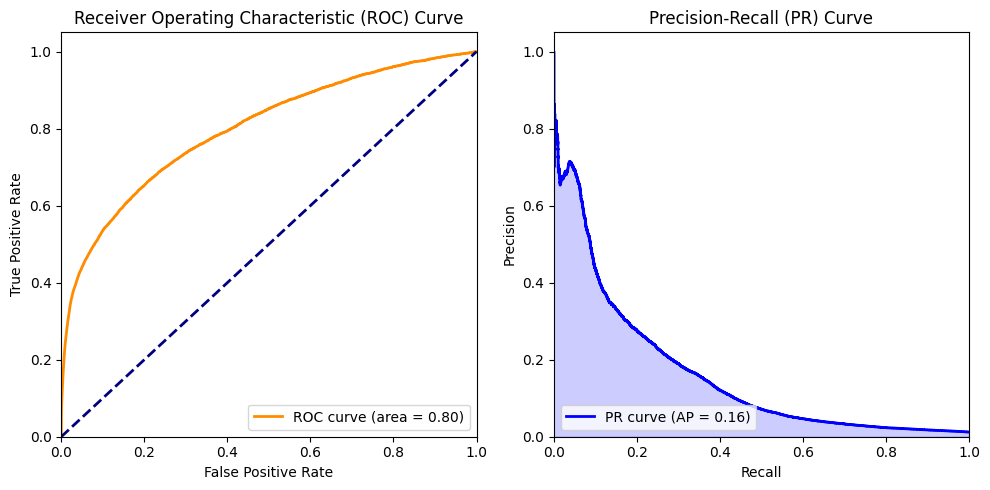

In [33]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

y_proba_lr_best = lr_best.predict_proba(X_test_s)[:, 1]  # Probability estimates for the positive class


fpr, tpr, _ = roc_curve(y_test, y_proba_lr_best)
roc_auc = auc(fpr, tpr)


precision, recall, _ = precision_recall_curve(y_test, y_proba_lr_best)
average_precision = average_precision_score(y_test, y_proba_lr_best)

# Plot the ROC curve
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  # Subplot for ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Plot the Precision-Recall curve
plt.subplot(1, 2, 2) 
plt.plot(recall, precision, color='blue', lw=2, label='PR curve (AP = %0.2f)' % average_precision)
plt.fill_between(recall, precision, step='post', alpha=0.2, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall (PR) Curve')
plt.legend(loc="lower left")
plt.tight_layout()
plt.show()


This one works better than the previous one but recall is still pretty bad 

In [26]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import numpy as np


n_neighbors = [1,5,10]
weights = ('uniform', 'distance')

l_n_neighbors = len(n_neighbors)
l_weights = len(weights)
results_knn = np.zeros((l_n_neighbors, l_weights))

for i in range(len(n_neighbors)):
    for j in range(len(weights)):
        n_neighbors_k = n_neighbors[i]
        weights_k = weights[j]
        knn = KNeighborsClassifier(n_neighbors=n_neighbors_k, weights=weights_k)
        knn.fit(X_train_s, y_train)
        y_pred = knn.predict(X_val_s)
        tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
        # Error de Tipo I: FP / (FP + TN)
        error_tipo_1 = fp / (fp + tn) if (fp + tn) > 0 else 0  # Evita la división por cero
        results_knn[i][j] = error_tipo_1

print(results_knn)


"\nfrom sklearn.neighbors import KNeighborsClassifier\nfrom sklearn.metrics import confusion_matrix\nimport numpy as np\n\n# Asegúrate de que tus conjuntos de datos están definidos: X_train_s, y_train, X_val_s, y_val\n\nn_neighbors = [1,5,10]\nweights = ('uniform', 'distance')\n\nl_n_neighbors = len(n_neighbors)\nl_weights = len(weights)\nresults_knn = np.zeros((l_n_neighbors, l_weights))\n\nfor i in range(len(n_neighbors)):\n    for j in range(len(weights)):\n        n_neighbors_k = n_neighbors[i]\n        weights_k = weights[j]\n        knn = KNeighborsClassifier(n_neighbors=n_neighbors_k, weights=weights_k)\n        knn.fit(X_train_s, y_train)\n        y_pred = knn.predict(X_val_s)\n        tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()\n        # Error de Tipo I: FP / (FP + TN)\n        error_tipo_1 = fp / (fp + tn) if (fp + tn) > 0 else 0  # Evita la división por cero\n        results_knn[i][j] = error_tipo_1\n\nprint(results_knn)\n"

I tried knn (althoug is not linear) to check if I would get some better results but as it took 3h to train and this algorith is not the goal of this assigment ill leave it like this.
The results were: [[0.00983022 0.00983022]
 [0.00113473 0.00174479]
 [0.00035572 0.00085905]]

In [25]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import numpy as np

# Asegúrate de que tus conjuntos de datos están definidos: X_train_s, y_train, X_val_s, y_val

parameters = {
    'n_estimators': [10, 20, 50, 100, 150],
    'max_depth': [5, 10, 15, 20]
}

l_n_estimators = len(parameters['n_estimators'])
l_max_depth = len(parameters['max_depth'])
results_rf = np.zeros((l_n_estimators, l_max_depth))

for i, n_estimators in enumerate(parameters['n_estimators']):
    for j, max_depth in enumerate(parameters['max_depth']):
        rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
        rf.fit(X_train_s, y_train)
        y_pred = rf.predict(X_val_s)
        tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
        # Error de Tipo I: FP / (FP + TN)
        error_tipo_1 = fp / (fp + tn) if (fp + tn) > 0 else 0  # Evita la división por cero
        results_rf[i][j] = error_tipo_1

print(results_rf)
'''

[[2.84572945e-05 1.28057825e-04 2.82794364e-04 4.83774006e-04]
 [6.75860744e-05 1.19164921e-04 2.29436937e-04 3.50380438e-04]
 [4.44645226e-05 1.19164921e-04 1.68965186e-04 2.65008555e-04]
 [2.31215518e-05 1.17386340e-04 1.70743767e-04 2.38329841e-04]
 [2.13429709e-05 1.20943502e-04 1.68965186e-04 2.32994099e-04]]


[[2.84572945e-05 1.28057825e-04 2.82794364e-04 4.83774006e-04]
 [6.75860744e-05 1.19164921e-04 2.29436937e-04 3.50380438e-04]
 [4.44645226e-05 1.19164921e-04 1.68965186e-04 2.65008555e-04]
 [2.31215518e-05 1.17386340e-04 1.70743767e-04 2.38329841e-04]
 [2.13429709e-05 1.20943502e-04 1.68965186e-04 2.32994099e-04]]

In [5]:
import numpy as np

parameters = {
    'n_estimators': [10, 20, 50, 100, 150],
    'max_depth': [5, 10, 15, 20]
}

results_rf = [
    [2.84572945e-05, 1.28057825e-04, 2.82794364e-04, 4.83774006e-04],
    [6.75860744e-05, 1.19164921e-04, 2.29463937e-04, 3.50830438e-04],
    [4.44645226e-05, 1.19164921e-04, 1.68965186e-04, 2.65008555e-04],
    [2.31215518e-05, 1.17386340e-04, 1.70743767e-04, 2.38329841e-04],
    [2.13429709e-05, 1.20943520e-04, 1.68965186e-04, 2.32994099e-04]
]

best_params_rf = np.max(results_rf)  # Buscamos valor max de la
pos = np.where(results_rf == best_params_rf)  # Buscamos su posición
best_n_estimators_index = pos[0][0]
best_depth_index = pos[1][0]

print('The best n_estimators is: ', parameters['n_estimators'][best_n_estimators_index])
print('The depth  is: ', parameters['max_depth'][best_depth_index])


The best n_estimators is:  10
The depth  is:  20


In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import numpy as np
from sklearn.metrics import precision_score, recall_score


rf_model = RandomForestClassifier(n_estimators=10, max_depth=20, random_state=42)
rf_model.fit(X_train, y_train)
y_test_predictions = rf_model.predict(X_test)

precision = precision_score(y_test, y_test_predictions)
recall = recall_score(y_test, y_test_predictions)


print(f"Precision: {precision}")
print(f"Recall: {recall}")


Precision: 0.6333333333333333
Recall: 0.07578347578347579


El recall es bastante malo


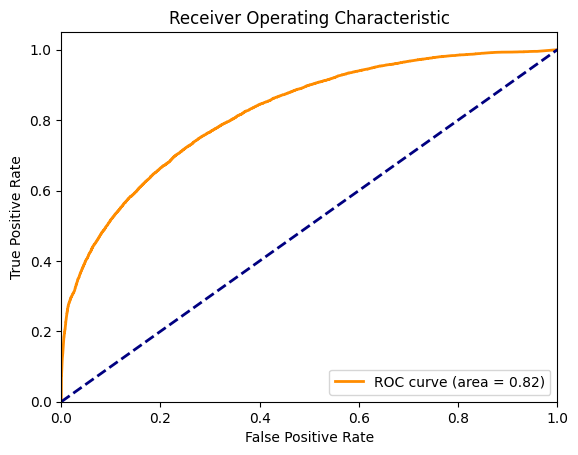

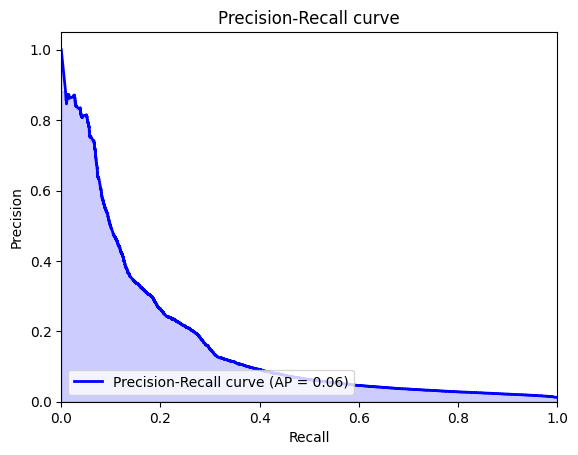

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score


# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

precision, recall, _ = precision_recall_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
average_precision = average_precision_score(y_test, y_test_predictions)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Plot Precision-Recall curve
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (AP = %0.2f)' % average_precision)
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve')
plt.legend(loc="lower left")
plt.show()


Using RF( also not linear) our classifier gets better

I will leave it here as I dont know what else to try appart from more algorithm and more hyperparameters, I will watch the solution proposed by Guille and take some notes from it 